In [1]:
import torch
from torchvision import transforms
from model import ResnetCBAMTriplet
from PIL import Image
import matplotlib.pyplot as plt
from torch.nn.modules.distance import PairwiseDistance

In [2]:
EMBEDDING_DIMENSION = 64

In [3]:
# 数据预处理
data_transforms = transforms.Compose([
    transforms.ToTensor(), # 变成tensor
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

In [4]:
# 加载模型
model = ResnetCBAMTriplet(model_version='18',pretrained=False,embedding_dimension = EMBEDDING_DIMENSION)
model_pathi='./Model_training_checkpoints/model_resnet18cbam_triplet_epoch_100_'+str(EMBEDDING_DIMENSION)+'.pt'
model_state = torch.load(model_pathi)
model.load_state_dict(model_state['model_state_dict'])
model.eval()

ResnetCBAMTriplet(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (ca): ChannelAttention(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (max_pool): AdaptiveMaxPool2d(output_size=1)
          (fc1): Conv2d(64, 4, kernel_size=(1, 1), str

In [5]:
def load_img_data(img_path, show_img = False):
    img = Image.open(img_path).convert('RGB')
    if show_img:
        plt.imshow(img)
        plt.show()
    img = data_transforms(img)
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    return img

In [6]:
def get_face_vector(model, path):
    img = load_img_data(path, show_img = True)
    with torch.no_grad():
        img_output = model(img)
    output = torch.div(img_output, torch.norm(img_output))
    return output

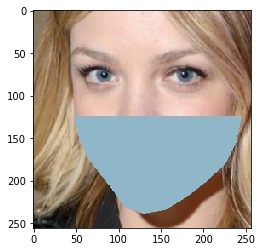

tensor([[ 0.0094,  0.1226, -0.0426, -0.0354, -0.0688, -0.1468,  0.1478,  0.1667,
          0.0455, -0.0318, -0.1380,  0.2055, -0.0500,  0.0982,  0.0168, -0.0242,
         -0.1605,  0.0995, -0.0846, -0.1750,  0.2065, -0.1435,  0.1355, -0.0229,
          0.0444, -0.2811, -0.0636, -0.0297,  0.0477, -0.1998,  0.0702,  0.0646,
         -0.0169, -0.1261, -0.0279, -0.1347, -0.1400,  0.3335,  0.1720, -0.0302,
          0.1257, -0.0119,  0.1587, -0.0843, -0.1306, -0.1880, -0.0523,  0.1247,
         -0.0474,  0.1207, -0.0979, -0.0498,  0.1661, -0.0678, -0.1269, -0.0289,
          0.1033,  0.0908,  0.0355,  0.0841, -0.1405,  0.2631, -0.1035, -0.1243]])


In [7]:
img_path1 = './test_images/1.jpg'
img1_out = get_face_vector(model, img_path1)
print(img1_out)

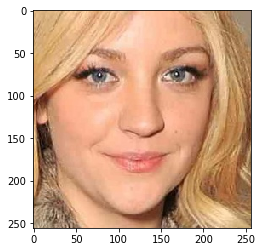

tensor([[ 0.0753,  0.1357, -0.0760, -0.0269,  0.0305, -0.1075,  0.0881,  0.1603,
          0.0262,  0.0279, -0.1475,  0.2031, -0.0778,  0.1421, -0.0269, -0.0110,
         -0.1455,  0.1726, -0.0845, -0.1664,  0.1993, -0.2225,  0.0896,  0.0419,
          0.0193, -0.2504, -0.0714, -0.0325,  0.1439, -0.1555,  0.0881,  0.1161,
         -0.0139, -0.1714,  0.0602, -0.0339, -0.1174,  0.2825,  0.0661, -0.0323,
          0.1209, -0.0182,  0.1784, -0.1542, -0.0655, -0.1532, -0.0537,  0.1529,
         -0.1256,  0.1451, -0.0715, -0.0377,  0.1888, -0.1812, -0.1062, -0.0788,
          0.0977,  0.0709,  0.0340,  0.0500, -0.1401,  0.2752, -0.0578, -0.0875]])


In [8]:
img_path2 = './test_images/2.jpg'
img2_out = get_face_vector(model, img_path2)
print(img2_out)

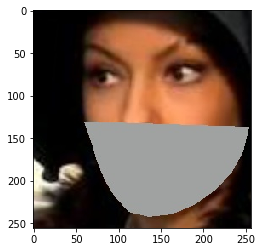

tensor([[-0.0987, -0.0893,  0.1707,  0.0587, -0.0011,  0.0471, -0.1606, -0.1750,
         -0.1170, -0.0847,  0.1613, -0.1257,  0.0727, -0.2033,  0.0570,  0.0530,
          0.0133,  0.0148,  0.1889,  0.1507, -0.1029,  0.0922, -0.0993, -0.0522,
          0.0971,  0.0611, -0.0506, -0.1765,  0.0702,  0.1883, -0.0423,  0.0847,
          0.1140,  0.0776,  0.0536,  0.0784,  0.0474, -0.1227, -0.1235, -0.1242,
          0.0032, -0.1166, -0.0196,  0.0909,  0.0604,  0.3061,  0.1360, -0.1599,
         -0.0567, -0.1713,  0.1784,  0.1017, -0.1043,  0.0879,  0.1995, -0.0187,
         -0.0990, -0.2609,  0.0592, -0.0225,  0.2537, -0.0710,  0.2410,  0.0808]])


In [9]:
img_path3 = './test_images/3.jpg'
img3_out = get_face_vector(model, img_path3)
print(img3_out)

In [10]:
# 计算两个向量的欧氏距离
pdist = PairwiseDistance(2)
img1_img2 = pdist(img1_out,img2_out)
print(img1_img2)

tensor([0.3722])


In [11]:
img1_img3 = pdist(img1_out,img3_out)
print(img1_img3)

tensor([1.8349])


In [12]:
# 计算两个向量的余弦相似度
cos_sim1_2 = torch.cosine_similarity(img1_out,img2_out)
print(cos_sim1_2)

tensor([0.9307])


In [13]:
cos_sim1_3 = torch.cosine_similarity(img1_out,img3_out)
print(cos_sim1_3)

tensor([-0.6834])
